In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import uproot

In [2]:
import pandas as pd

In [3]:
f = uproot.open("/gpfs/slac/atlas/fs1/d/rafaeltl/public/L1BTag/FTAGntups/user.rateixei.450000.aMcAtNloHerwig7EvtGen_UEEE5_CTEQ6L1_CT10ME_hh_bbbb.recon.FTAGntupl.29Apr2020slc6_Akt4EMTo/user.rateixei.21162715.Akt4EMTo.root")

In [4]:
tree = f['bTag_AntiKt4EMTopoJets'].arrays()

In [5]:
tree.keys()

dict_keys([b'runnb', b'eventnb', b'mcchan', b'mcwg', b'avgmu', b'actmu', b'PVx', b'PVy', b'PVz', b'truth_PVx', b'truth_PVy', b'truth_PVz', b'njets', b'jet_pt', b'jet_eta', b'jet_phi', b'jet_E', b'jet_m', b'jet_nConst', b'jet_dRiso', b'jet_LabDr_HadF', b'jet_aliveAfterOR', b'jet_aliveAfterORmu', b'jet_ntrk', b'jet_trk_pt', b'jet_trk_eta', b'jet_trk_phi', b'jet_trk_dr', b'jet_trk_ptfrac', b'jet_trk_ip3d_d0', b'jet_trk_ip3d_z0', b'jet_trk_ip3d_d0sig', b'jet_trk_ip3d_z0sig'])

In [6]:
jarrs = [b'jet_pt', b'jet_eta', b'jet_phi', b'jet_E', b'jet_m', b'jet_nConst', b'jet_dRiso', b'jet_LabDr_HadF', b'jet_aliveAfterOR', b'jet_aliveAfterORmu']

In [7]:
tree[b'jet_pt']

<JaggedArray [[314854.0 191906.48 142852.1 ... 65759.805 41634.477 25661.06] [283449.4 261878.44 121604.95 ... 31488.81 29947.057 20765.896] [82548.2 63851.77 52865.027 ... 24295.986 23617.594 23168.31] ... [411927.8 209333.88 98225.05 ... 53461.234 35033.03 33426.457] [159545.28 105114.96 96983.01 ... 31394.46 24041.168 21414.03] [122832.33 90542.12 63959.535 32354.566 27912.354 23169.111]] at 0x7f2b27da6ac8>

In [8]:
nentries = tree[b'jet_pt'].shape[0]
print(nentries)

100000


In [9]:
pad = {
}

for jar in jarrs:
    this_jar = str(jar, 'utf-8')
    pad[this_jar] = -99*np.ones( (nentries,10) )

In [10]:
for i in range(0, nentries):
    njets = tree[b'jet_pt'][i].shape[0]
    min_jets = min(10, njets)
    
    for jar in jarrs:
        this_jar = str(jar, 'utf-8')
        pad[this_jar][i, :min_jets] = tree[jar][i, :min_jets]
        

In [11]:
pad['jet_pt'][:,0]

array([314854.      , 283449.40625 ,  82548.203125, ..., 411927.8125  ,
       159545.28125 , 122832.328125])

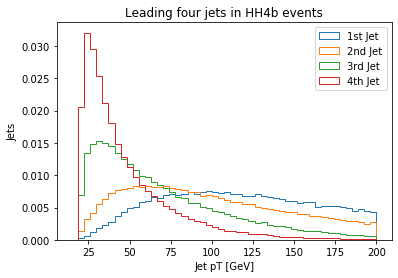

In [12]:
plt.Figure()
plt.hist( pad['jet_pt'][:,0]*1e-3, histtype='step', density=1, bins=50, range=(15, 200), label='1st Jet' )
plt.hist( pad['jet_pt'][:,1]*1e-3, histtype='step', density=1, bins=50, range=(15, 200), label='2nd Jet' )
plt.hist( pad['jet_pt'][:,2]*1e-3, histtype='step', density=1, bins=50, range=(15, 200), label='3rd Jet' )
plt.hist( pad['jet_pt'][:,3]*1e-3, histtype='step', density=1, bins=50, range=(15, 200), label='4th Jet' )
plt.legend()
plt.xlabel("Jet pT [GeV]")
plt.ylabel("Jets")
plt.title("Leading four jets in HH4b events")
plt.savefig("wps/hh4b_jets.pdf")
plt.show()

In [13]:
import uproot_methods as um

In [14]:
my_jets = []
for ij in range(0,4):
    this_jet = um.TLorentzVectorArray.from_ptetaphie(pad['jet_pt'][:,ij]*1e-3, 
                                           pad['jet_eta'][:,ij], 
                                           pad['jet_phi'][:,ij], 
                                           pad['jet_E'][:,ij]*1e-3)
    my_jets.append(this_jet)

In [15]:
my_4jets = my_jets[0] + my_jets[1] + my_jets[2] + my_jets[3]

In [16]:
my_4jets.mass

/opt/rh/rh-python36/root/usr/lib/python3.6/site-packages/uproot_methods/classes/TLorentzVector.py:189: RuntimeWarning: invalid value encountered in sqrt
  return self._trymemo("mass", lambda self: self.awkward.numpy.sqrt(self.mag2))


array([1348.41415962, 1283.05795297,  629.80012627, ..., 3032.28923855,
        441.87979487,  404.07991449])

In [17]:
my_pt_sum = my_jets[0].pt + my_jets[1].pt + my_jets[2].pt + my_jets[3].pt

/opt/rh/rh-python36/root/usr/lib64/python3.6/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/rh/rh-python36/root/usr/lib64/python3.6/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


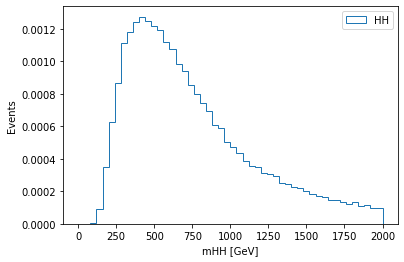

In [18]:
plt.Figure()
plt.hist( my_4jets.mass, histtype='step', density=1, bins=50, range=(0, 2000), label='HH' )
plt.legend()
plt.xlabel("mHH [GeV]")
plt.ylabel("Events")
# plt.title("Leading four jets in HH4b events")
# plt.savefig("wps/hh4b_jets.pdf")
plt.show()

In [19]:
from matplotlib.colors import LogNorm

/opt/rh/rh-python36/root/usr/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


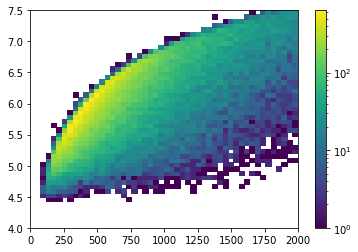

/opt/rh/rh-python36/root/usr/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in log
  import sys


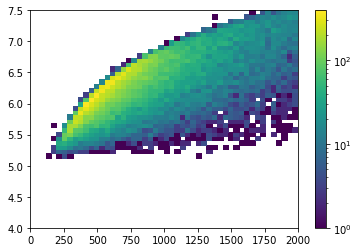

In [20]:
fig, ax = plt.subplots()
h = ax.hist2d(my_4jets.mass, np.log(my_pt_sum), bins=(50,50), range=((0,2000),(4,7.5)), norm=LogNorm())
plt.colorbar(h[3], ax=ax)
plt.show()

fig, ax = plt.subplots()
h = ax.hist2d(my_4jets.mass[my_jets[3].pt>40], np.log(my_pt_sum)[my_jets[3].pt>40], bins=(50,50), range=((0,2000),(4,7.5)), norm=LogNorm())
plt.colorbar(h[3], ax=ax)
plt.show()

In [36]:
num_central_jets = 1.0*( (pad['jet_pt'][:,0]*1e-3 > 25) & (np.abs(pad['jet_eta'][:,0]) < 2.5) ) + \
                    1.0*( (pad['jet_pt'][:,1]*1e-3 > 25) & (np.abs(pad['jet_eta'][:,1]) < 2.5) ) + \
                    1.0*( (pad['jet_pt'][:,2]*1e-3 > 25) & (np.abs(pad['jet_eta'][:,2]) < 2.5) ) + \
                    1.0*( (pad['jet_pt'][:,3]*1e-3 > 25) & (np.abs(pad['jet_eta'][:,3]) < 2.5) )

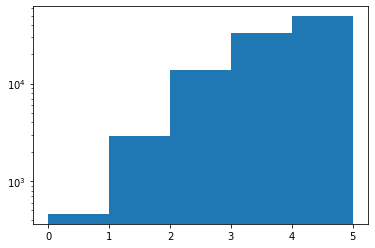

In [37]:
plt.Figure()
plt.hist(num_central_jets, bins=5, range=(0,5))
plt.yscale('log')
plt.show()

In [33]:
sel_run2 = ( (pad['jet_pt'][:,0]*1e-3 > 40) & (np.abs(pad['jet_eta'][:,0]) < 2.5) &
                              (pad['jet_pt'][:,1]*1e-3 > 40) & (np.abs(pad['jet_eta'][:,1]) < 2.5) &
                              (pad['jet_pt'][:,2]*1e-3 > 40) &
                              (pad['jet_pt'][:,3]*1e-3 > 40)
                            )

In [42]:
sel=( (pad['jet_pt'][:,0]*1e-3 > 25) &
                              (pad['jet_pt'][:,1]*1e-3 > 25) &
                              (pad['jet_pt'][:,2]*1e-3 > 25) &
                              (pad['jet_pt'][:,3]*1e-3 > 25) &
                              (num_central_jets > 2)
                            )

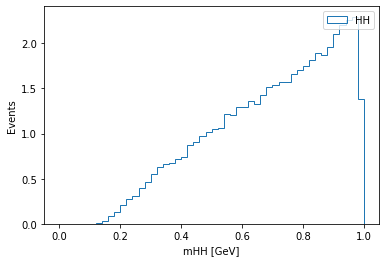

In [43]:
plt.Figure()
plt.hist( (my_pt_sum/my_4jets.mass)[sel], histtype='step', density=1, bins=50, range=(0, 1), label='HH' )
plt.legend()
plt.xlabel("mHH [GeV]")
plt.ylabel("Events")
# plt.title("Leading four jets in HH4b events")
# plt.savefig("wps/hh4b_jets.pdf")
# plt.yscale('log')
plt.show()

In [44]:
sel_extra = sel & ((my_pt_sum/my_4jets.mass) > 0.65)

/opt/rh/rh-python36/root/usr/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.


In [48]:
my_pt_sum

array([791.37657813, 734.06138281, 232.78744141, ..., 792.28669531,
       401.20667969, 309.68854687])

In [ ]:
plt.Figure()
plt.hist(my_pt_sum[sel], range=(0,500), bins=100)
plt.show()

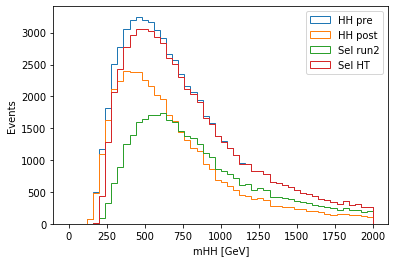

In [52]:
plt.Figure()
plt.hist( my_4jets.mass[sel], histtype='step', density=0, bins=50, range=(0, 2000), label='HH pre' )
plt.hist( my_4jets.mass[sel_extra], histtype='step', density=0, bins=50, range=(0, 2000), label='HH post' )
plt.hist( my_4jets.mass[sel_run2], histtype='step', density=0, bins=50, range=(0, 2000), label='Sel run2' )
plt.hist( my_4jets.mass[sel & (my_pt_sum > 200)], histtype='step', density=0, bins=50, range=(0, 2000), label='Sel HT' )
plt.legend()
plt.xlabel("mHH [GeV]")
plt.ylabel("Events")
# plt.title("Leading four jets in HH4b events")
# plt.savefig("wps/hh4b_jets.pdf")
plt.show()

In [23]:
ind_l_40 = pad['jet_pt'][:,0] > 40*1e3

In [ ]:
print(ind_l_40.shape)

# Get performance and bin and interpolate

In [ ]:
import h5py

In [ ]:
ds_entries = ["pt", "eta","ip3d", "dips", "flav"]
d = {
    'mou': {"file": "dss/ds_summary_r11004_RT_ConfigHTT_eff95flat_MoU2_sf2_pt4.h5" },
    'in':  {"file": "dss/ds_summary_r11004_RT_ConfigHTT_eff95flat_NewMoU_InIn_sf2_pt4.h5" },
    'out': {"file": "dss/ds_summary_r11004_RT_ConfigHTT_eff95flat_NewMoU_OutOut_sf2_pt4.h5" },
    'tdr': {"file": "dss/ds_summary_r11002_RT_ConfigHTT_eff95flat_TDR2in_sf2_pt4.h5" },
    'npx': {"file": "dss/ds_summary_r11002_ConfigHTT_eff95flat_NoPix_In_sf2_pt4.h5" },
    'px4': {"file": "dss/ds_summary_r11002_eff95flat_PIX4L2_InIn_sf2_pt4.h5" }
}

for de in d:
    print(de)
    with h5py.File(d[de]["file"], "r") as tf:
        for dse in ds_entries:
            d[de][dse] = tf[dse][()]

In [ ]:
pt_bins = [20, 40, 60, 90, 120, 250]
eta_bins = [ 0, 1, 2.5, 4.0 ]
disc_bins_wps = [ 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 0.99 ]

In [ ]:
import itertools
import utilsPerf as uperf

In [ ]:
from scipy import interpolate

In [ ]:
for scn in d:
    flav_b = d[scn]['flav'] == 5
    flav_u = d[scn]['flav'] == 0
    flav_c = d[scn]['flav'] == 4
    my_wps = [ uperf.find_wp(d[scn]['dips'].flatten()[flav_b], xeff, -0.000001, 1.00001) for xeff in disc_bins_wps ]
#     print(my_wps)
#     my_points = list(itertools.product(pt_bins,eta_bins,my_wps))
    my_effs = []
    my_points = []
    my_effs_u = []
    my_points_u = []
    my_effs_c = []
    my_points_c = []
    for ip in range(len(pt_bins)):
        
        pt_cut = (d[scn]['pt'] > pt_bins[ip]*1e3)
        this_pt_bin = pt_bins[ip]
        if ip < len(pt_bins)-1:
            pt_cut = pt_cut & (d[scn]['pt'] < pt_bins[ip+1]*1e3)
            this_pt_bin = 0.5*( pt_bins[ip] + pt_bins[ip+1] )
        if ip == len(pt_bins)-1:
            break
            
        for ie in range(len(eta_bins)):
            
            eta_cut = (d[scn]['eta'] > eta_bins[ie])
            this_eta_bin = eta_bins[ie]
            if ie < len(eta_bins)-1:
                eta_cut = eta_cut & (d[scn]['eta'] < eta_bins[ie+1])
                this_eta_bin = 0.5*(eta_bins[ie] + eta_bins[ie+1])
            if ie == len(eta_bins)-1:
                break
            
            for iwp in range(len(my_wps)):
                
                dips_cut = d[scn]['dips'].flatten() > my_wps[iwp]
                
                for this_flav,this_points,this_effs,fl_name in zip( (flav_b,flav_u,flav_c),
                                                           (my_points,my_points_u,my_points_c),
                                                           (my_effs,my_effs_u,my_effs_c),
                                                          ("b", "l", "c") ):
                    
                    all_cuts = this_flav & pt_cut & eta_cut
                    denom = 1.0*all_cuts
                    denom_sum = denom.sum()
                    
                    all_cuts_dips = this_flav & pt_cut & eta_cut & dips_cut
                    nume = 1.0*all_cuts_dips
                    nume_sum = nume.sum()
                    if nume_sum < 1: 
                        print("nume_sum < 1", fl_name, nume_sum, this_pt_bin, this_eta_bin, disc_bins_wps[iwp], my_wps[iwp])
                        this_eff = 1e-4
                    else:
                        this_eff = nume_sum/denom_sum
                    
                    this_points.append( [this_pt_bin, this_eta_bin, disc_bins_wps[iwp]] )
                    this_effs.append(this_eff)
                
    d[scn]['b_linter'] = interpolate.LinearNDInterpolator(my_points, my_effs)
    d[scn]['b_ninter'] = interpolate.NearestNDInterpolator(my_points, my_effs)
    
    d[scn]['u_linter'] = interpolate.LinearNDInterpolator(my_points_u, my_effs_u)
    d[scn]['u_ninter'] = interpolate.NearestNDInterpolator(my_points_u, my_effs_u)
                
    d[scn]['c_linter'] = interpolate.LinearNDInterpolator(my_points_c, my_effs_c)
    d[scn]['c_ninter'] = interpolate.NearestNDInterpolator(my_points_c, my_effs_c)

In [ ]:
d['out']['linter']( [190.0, 1.2, 0.7] )

In [ ]:
def get_jet_tagging_prob(jpt, jeta, mwp, ipola):
    this_jet_eff = ipola( [jpt, jeta, mwp] )
#     print("get_jet_tagging_prob", this_jet_eff)
    this_rand_number = np.random.uniform(0,1)
#     print("get_jet_tagging_prob", this_rand_number)
    return [this_rand_number < this_jet_eff, this_jet_eff]

In [ ]:
def get_combinatorics_4(pj1, pj2, pj3, pj4):
    p2tag = pj1*pj2*(1-pj3)*(1-pj4)
    p2tag+= pj1*pj3*(1-pj2)*(1-pj4)
    p2tag+= pj1*pj4*(1-pj2)*(1-pj3)
    p2tag+= pj2*pj3*(1-pj1)*(1-pj4)
    p2tag+= pj2*pj4*(1-pj1)*(1-pj3)
    p2tag+= pj3*pj4*(1-pj1)*(1-pj2)
    
    p2tag+= pj1*pj2*pj3*(1-pj4)
    p2tag+= pj1*pj2*pj4*(1-pj3)
    p2tag+= pj1*pj4*pj3*(1-pj2)
    p2tag+= pj4*pj2*pj3*(1-pj1)
    
    p2tag+=pj1*pj2*pj3*pj4
    
    return p2tag

In [ ]:
def get_combinatorics_3(pj1, pj2, pj3):
    p2tag = pj1*pj2*(1-pj3)
    p2tag+= pj1*pj3*(1-pj2)
    p2tag+= pj2*pj3*(1-pj1)
    
    p2tag+=pj1*pj2*pj3
    
    return p2tag

In [ ]:
def get_event_eff(data, mwp, ipp, ptcut=[40,40,40,40], etacut=4.0, ntags=2):
    tot_evs = data['jet_pt'].shape[0]
    
    tot_4jets = 0
    passed = 0
    passed_weights = 0

    for ie in range(tot_evs):
        is_good = True
        my_jets = []
        for ij in range(10):

            if np.abs(data['jet_eta'][ie][ij]) > etacut:
                continue

            if data['jet_pt'][ie][ij] > ptcut[len(my_jets)]*1e3:
                my_jets.append( [data['jet_pt'][ie][ij]*1e-3, np.abs(data['jet_eta'][ie][ij]),data['jet_LabDr_HadF'][ie][ij] ] )
                
            if len(my_jets) == len(ptcut): 
                break
        
        if len(my_jets) < len(ptcut):
            continue
        tot_4jets += 1
        
        total_tag = 0
        my_probs = []
        
        for mj in my_jets:
            prefx = 'b_' if mj[2] == 5 else 'u_'
            if mj[2] == 4: prefx = 'c_'
                        
            ipola = d[ipp[0]][ prefx+ipp[1] ]
                    
            tag_prob = get_jet_tagging_prob( mj[0], mj[1], mwp, ipola )

            total_tag += int( tag_prob[0] )
            my_probs.append(tag_prob[1][0])
            
        if len(my_probs) == 4:
            comb_weight = get_combinatorics_4(my_probs[0], my_probs[1], my_probs[2], my_probs[3]  )
            passed_weights += 1 * comb_weight
        elif len(my_probs) == 3:
            comb_weight = get_combinatorics_3(my_probs[0], my_probs[1], my_probs[2]  )
            passed_weights += 1 * comb_weight
        
        if total_tag >= ntags:
            passed += 1
    
    return [tot_evs, tot_4jets, passed, passed_weights]

In [ ]:
et = get_event_eff(pad, 0.4, ['in','ninter'], ptcut=[40,40,40])

In [ ]:
print(et)

In [ ]:
print(et[2]/et[1])

In [ ]:
wps = [0.6, 0.65, 0.7, 0.75, 0.8, 0.85]
for scn in d:
    for wp in wps:
        et = get_event_eff(pad, wp, [scn,'ninter'], ptcut=[40,40,40,40])
        print(scn, wp, et)

In [ ]:
wps = [0.4,0.45,0.5,0.55]
for scn in d:
    for wp in wps:
        et = get_event_eff(pad, wp, [scn,'ninter'], ptcut=[40,40,40,40])
        print(scn, wp, et)

In [ ]:
wps = [0.4,0.45,0.5,0.55,0.6, 0.65, 0.7, 0.75, 0.8, 0.85]
for scn in d:
    for wp in wps:
        et = get_event_eff(pad, wp, [scn,'ninter'], ptcut=[50,50,50,50])
        print(scn, wp, et)

In [ ]:
# for scn in d:
#     flav_b = d[scn]['flav'] == 5
#     my_wps = [ uperf.find_wp(d[scn]['dips'].flatten()[flav_b], xeff, -0.000001, 1.00001) for xeff in disc_bins_wps ]
# #     print(my_wps)
# #     my_points = list(itertools.product(pt_bins,eta_bins,my_wps))
#     my_effs = []
#     my_points = []
#     for ip in range(len(pt_bins)):
        
#         pt_cut = (d[scn]['pt'] > pt_bins[ip]*1e3)
#         this_pt_bin = pt_bins[ip]
#         if ip < len(pt_bins)-1:
#             pt_cut = pt_cut & (d[scn]['pt'] < pt_bins[ip+1]*1e3)
#             this_pt_bin = 0.5*( pt_bins[ip] + pt_bins[ip+1] )
#         if ip == len(pt_bins)-1:
#             break
            
#         for ie in range(len(eta_bins)):
            
#             eta_cut = (d[scn]['eta'] > eta_bins[ie])
#             this_eta_bin = eta_bins[ie]
#             if ie < len(eta_bins)-1:
#                 eta_cut = eta_cut & (d[scn]['eta'] < eta_bins[ie+1])
#                 this_eta_bin = 0.5*(eta_bins[ie] + eta_bins[ie+1])
#             if ie == len(eta_bins)-1:
#                 break
            
#             for iwp in range(len(my_wps)):
                
#                 dips_cut = d[scn]['dips'].flatten() > my_wps[iwp]
                
#                 all_cuts = flav_b & pt_cut & eta_cut
#                 denom = 1.0*all_cuts
#                 denom_sum = denom.sum()
                
                
#                 all_cuts_dips = flav_b & pt_cut & eta_cut & dips_cut
#                 nume = 1.0*all_cuts_dips
#                 nume_sum = nume.sum()
                
#                 this_eff = nume_sum/denom_sum
                
# #                 print( scn, pt_bins[ip], eta_bins[ie], my_wps[iwp], denom_sum, nume_sum, this_eff )
                
#                 my_points.append( [this_pt_bin, this_eta_bin, disc_bins_wps[iwp]] )
#                 my_effs.append(this_eff)
                
#     d[scn]['linter'] = interpolate.LinearNDInterpolator(my_points, my_effs)
#     d[scn]['ninter'] = interpolate.NearestNDInterpolator(my_points, my_effs)
    
                